In [2]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

import numpy as np
import pandas


In [4]:
data = pandas.read_csv('colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [5]:
len(data)

14157

In [6]:
names = data["name"]

In [7]:
#pip install seaborn


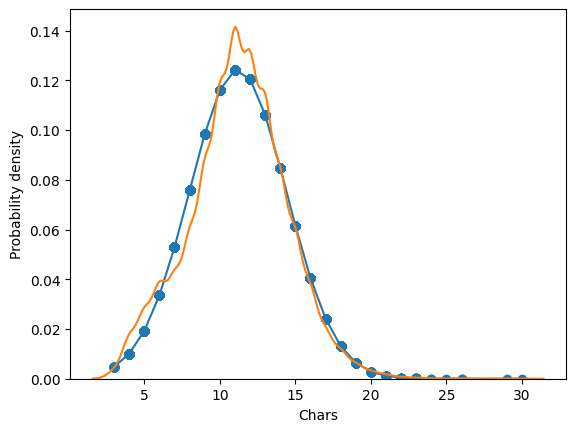

In [8]:
h = sorted(names.str.len().to_numpy())
import numpy as np
import scipy.stats as stats
import pylab as plt
import seaborn as sns
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
#plt.hist(h,normed=True)
sns.kdeplot(h)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [9]:
np.array(h).max()

30

In [10]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [11]:
from tensorflow.keras.utils import to_categorical

one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [12]:
one_hot_names.shape

(14157, 25, 28)

In [13]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [14]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (rest of your code)

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes))) # Now using the correct LSTM class
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 60s 138ms/step - acc: 0.5890 - loss: 0.0636 - val_acc: 0.6716 - val_loss: 0.0598
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - acc: 0.6502 - loss: 0.0566 - val_acc: 0.6674 - val_loss: 0.0563
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - acc: 0.6680 - loss: 0.0524 - val_acc: 0.6787 - val_loss: 0.0533
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - acc: 0.6724 - loss: 0.0492 - val_acc: 0.6730 - val_loss: 0.0505
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - acc: 0.6710 - loss: 0.0476 - val_acc: 0.6956 - val_loss: 0.0514
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 55s 138ms/step - acc: 0.6747 - loss: 0.0444 - val_acc: 0.6674 - val_loss: 0.0480
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - acc: 0.6850 - loss: 0.0434 - val_acc: 0.6455 - val_loss: 0.0468
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - acc: 0.6806 - loss: 0.0410 - val_acc: 0.6829 - val_loss: 0.0456
Epoch 9/40
399/399 ━━━━━━━━━━━━━

In [21]:
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - acc: 0.8047 - loss: 0.0116
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - acc: 0.8133 - loss: 0.0091
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - acc: 0.8199 - loss: 0.0069
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - acc: 0.8282 - loss: 0.0065
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - acc: 0.8378 - loss: 0.0057
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - acc: 0.8326 - loss: 0.0059
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - acc: 0.8379 - loss: 0.0059
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - acc: 0.8421 - loss: 0.0056
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 59s 133ms/step - acc: 0.8476 - loss: 0.0055
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - acc: 0.8499 - loss: 0.0056


In [23]:
model.save_weights('model_1.weights.h5')

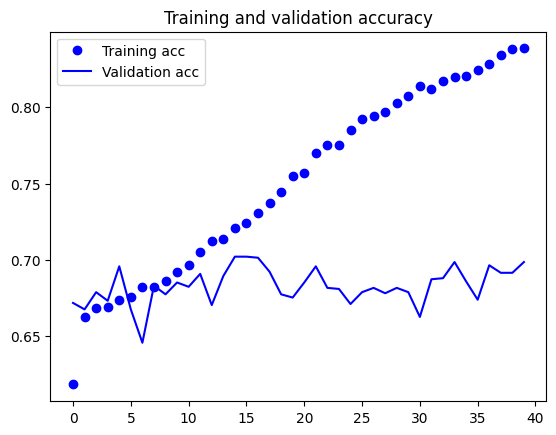

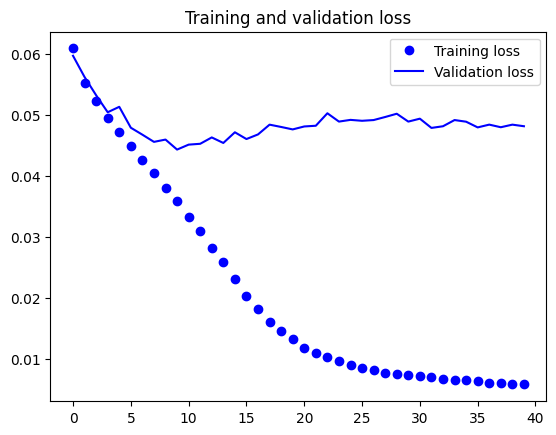

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [26]:
def scale(n):
    return int(n * 255)

In [29]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    # Use tensorflow.keras.utils.to_categorical instead of np_utils.to_categorical
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
light blue, R,G,B: 177 235 242


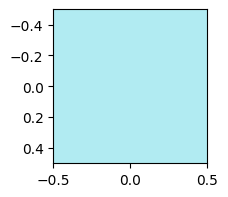

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
blue, R,G,B: 7 54 194


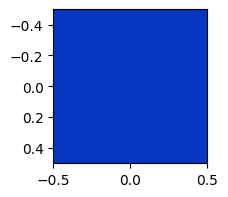

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
dark blue, R,G,B: 5 7 100


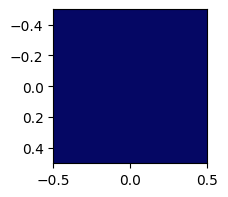

In [30]:
predict("light blue")
predict("blue")
predict("dark blue")